In [33]:
import tensorflow as tf
from tensorflow import keras


In [34]:
# Loading the data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [35]:
# The prepare validation and traind data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [37]:
# model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


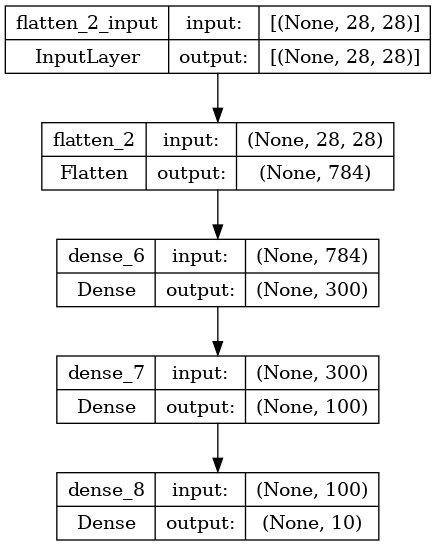

In [39]:
# Visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [40]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [41]:
#Train the model
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7276 - accuracy: 0.7579 - val_loss: 0.5092 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4940 - accuracy: 0.8277 - val_loss: 0.4532 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4483 - accuracy: 0.8429 - val_loss: 0.4158 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4216 - accuracy: 0.8506 - val_loss: 0.4130 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4004 - accuracy: 0.8594 - val_loss: 0.3845 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3855 - accuracy: 0.8648 - val_loss: 0.3974 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3721 - accuracy: 0.8680 - val_loss: 0.3688 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
# show the parameters of the model
history.params

In [ ]:
# The all loss,accuracy , val loss and val acuracy for each epoch (as dictionary)
history.history

In [ ]:
#If you create a Pandas DataFrame using this dictionary and call its plot() method, you get the learning curves 
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))  # make it a Dataframe object



In [ ]:
# Evuluate the method (test it on the X_test and compare the predict with the y_test)
model.evaluate(X_test, y_test)


In [ ]:
# 0,84 accuracy is not too bad.
# Next, we can use the model’s predict() method to make predictions on new instances. 
#Since we don’t have actual new instances, we will just use the first 3 instances of the test set:
X_new = X_test[:3]  # lets use first 3 instances of the test set  
y_predict = model.predict(X_new) 
y_predict.round(2)
# for each instance the model estimates one probability per class, from class 0 to class 9.

In [ ]:
# If you only care about the class with the highest estimated probability (even if that probability is quite low) 
# then you can use the np.argmax() method instead:
import numpy as np 
y_pred = model.predict(X_new)  #Prediction
y_pred_classes = np.argmax(y_pred, axis=1) # get the index
y_pred_classes

# array([9, 2, 1]) means that first instance belongs to 9th class,second instance belongs to 2nd class and third instance belongs to 1st class

In [ ]:
# and see with the class names
np.array(class_names)[y_pred_classes]
